In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from akvmodel import *

/home/csgrads/deoli036/projects/akvmodel-dynamicinfluence/akvmodel.py:166: SyntaxWarning: invalid escape sequence '\m'
  """Creates a clique influence graph.
/home/csgrads/deoli036/projects/akvmodel-dynamicinfluence/akvmodel.py:186: SyntaxWarning: invalid escape sequence '\m'
  """Creates a circular influence graph.
/home/csgrads/deoli036/projects/akvmodel-dynamicinfluence/akvmodel.py:213: SyntaxWarning: invalid escape sequence '\m'
  """Creates a faintly communicating influence graph.
/home/csgrads/deoli036/projects/akvmodel-dynamicinfluence/akvmodel.py:241: SyntaxWarning: invalid escape sequence '\m'
  """Creates a disconnected influence graph.
/home/csgrads/deoli036/projects/akvmodel-dynamicinfluence/akvmodel.py:263: SyntaxWarning: invalid escape sequence '\m'
  """Creates a malleable influencers influence graph.
/home/csgrads/deoli036/projects/akvmodel-dynamicinfluence/akvmodel.py:305: SyntaxWarning: invalid escape sequence '\m'
  """Creates an unrelenting influencers influence gra

In [2]:
NUM_AGENTS = 10
NUM_STEPS = 100

In [3]:
def get_influencer_history(
    influence_graph_history: list[list[list[float]]],
) -> list[list[float]]:
    return [influence_graph[0] for influence_graph in influence_graph_history]

Model and updates

In [4]:
NUM_AGENTS = 4
model = AKV(
    InitialConfigurations.mildly(NUM_AGENTS),
    InfluenceGraphs.circular(NUM_AGENTS),
    UpdateFunctions.single_influencer,
)
for _ in range(NUM_STEPS):
    model.update()

Set cases

In [6]:
initial_configurations = [
    [InitialConfigurations.uniform(NUM_AGENTS), "Uniform"],
    [InitialConfigurations.mildly(NUM_AGENTS), "Mildly polarized"],
    [InitialConfigurations.extreme(NUM_AGENTS), "Extremely polarized"],
    [InitialConfigurations.tripolar(NUM_AGENTS), "Tripolar"],
]
influence_graphs = [
    [InfluenceGraphs.clique(NUM_AGENTS), "Clique"],
    [InfluenceGraphs.circular(NUM_AGENTS), "Circular"],
    [InfluenceGraphs.faintly(NUM_AGENTS), "Faintly connected"],
    [InfluenceGraphs.disconnected(NUM_AGENTS), "Disconnected"],
    [InfluenceGraphs.malleable_influencers(NUM_AGENTS), "Malleable influencers"],
    [InfluenceGraphs.unrelenting_influencers(NUM_AGENTS), "Unrelenting influencers"],
]

Generate data

In [7]:
data = []
for influence_graph in influence_graphs:
    model = AKV(
        InitialConfigurations.mildly(NUM_AGENTS), influence_graph[0], UpdateFunctions.single_influencer
    )
    for _ in range(NUM_STEPS):
        model.update()
    data = data + [get_influencer_history(model.influence_graph_history)]

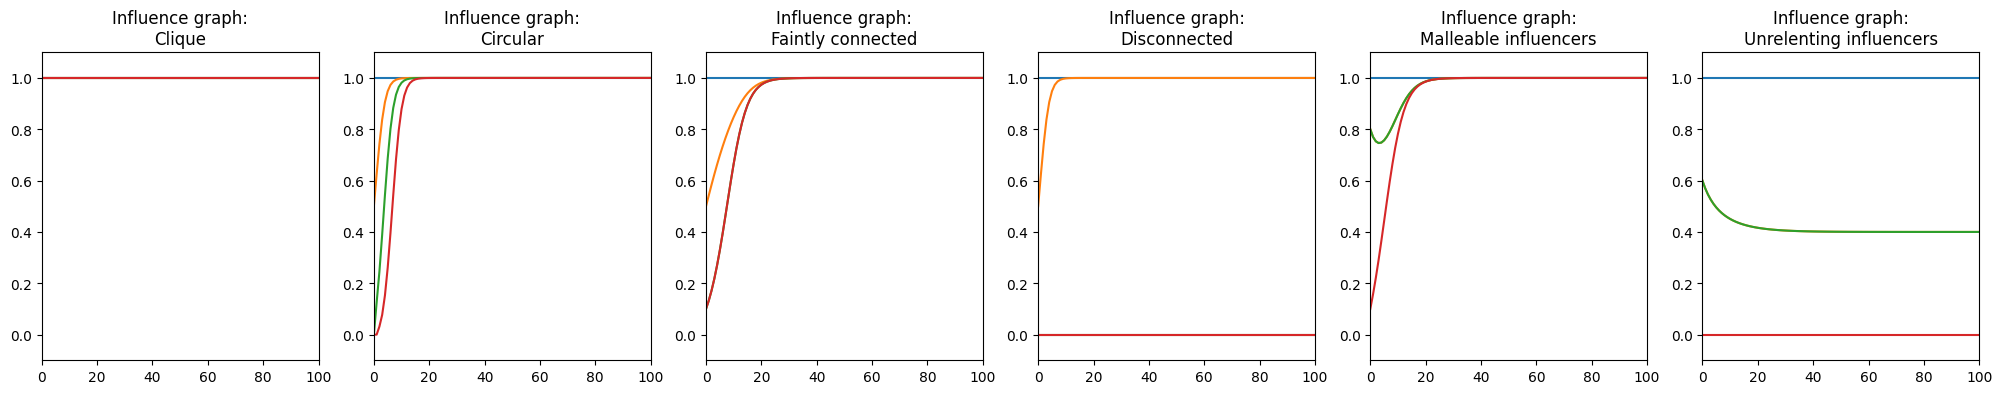

In [8]:
fig, axs = plt.subplots(
    1, len(influence_graphs), figsize=[25, 4]
)
fig.subplots_adjust(hspace=1)
for i in range(len(influence_graphs)):
    ax: plt.axes = axs[i]
    ax.plot(data[i])
    ax.set_xlim(0, NUM_STEPS)
    ax.set_ylim(-0.1, 1.1)
    ax.set_ymargin(1)
    ax.set_ymargin(1)
    ax.set_title(f"Influence graph:\n{influence_graphs[i][1]}")

In [9]:
data[1]

[array([1. , 0.5, 0. , 0. ]),
 array([1.   , 0.625, 0.125, 0.   ]),
 array([1.        , 0.7421875 , 0.24479167, 0.03125   ]),
 array([1.        , 0.83786011, 0.38931387, 0.07693142]),
 array([1.        , 0.90578538, 0.54332111, 0.15266616]),
 array([1.        , 0.94845449, 0.68643958, 0.26089505]),
 array([1.        , 0.97289878, 0.80185549, 0.39609541]),
 array([1.        , 0.98608215, 0.88332379, 0.54345671]),
 array([1.        , 0.99294422, 0.93480448, 0.68280506]),
 array([1.        , 0.99644722, 0.96480946, 0.79699907]),
 array([1.        , 0.9982173 , 0.98139981, 0.87889798]),
 array([1.        , 0.99910706, 0.99028746, 0.93146039]),
 array([1.        , 0.99955313, 0.99496346, 0.96254555]),
 array([1.        , 0.99977647, 0.9973988 , 0.97996574]),
 array([1.        , 0.99988821, 0.99865989, 0.98941555]),
 array([1.        , 0.9999441 , 0.99931071, 0.99444708]),
 array([1.        , 0.99997205, 0.99964588, 0.99709838]),
 array([1.        , 0.99998602, 0.99981824, 0.99848736]),
 arr

In [13]:
l1 = [1, 1, 1]
l2 = np.array([1, 1, 1])
l3 = np.array(l1)
l4 = np.array(l2)

In [15]:
l4

array([1, 1, 1])